# Algoritma *K-Nearest Neighbor* (KNN)
*Notebook* berisi Algoritma KNN, mulai dari penjelasan, implementasi *from scratch* hingga peningkatan hasil untuk melakukan submisi pada Kaggle.

## Mari berkenalan dengan Algoritma KNN

*K-Nearest Neighbors* (KNN) adalah salah satu algoritma dalam *machine learning* yang digunakan untuk masalah klasifikasi dan regresi. Algoritma ini bekerja dengan cara mencari k-tetangga terdekat dari suatu data point dalam ruang fitur untuk menentukan label atau nilai targetnya.

Berikut adalah langkah-langkah umum dari algoritma KNN:
1. **Pilih nilai K:** Tentukan jumlah tetangga terdekat yang akan digunakan dalam proses pengambilan keputusan. Nilai K ini dapat dipilih berdasarkan pengujian dan validasi model.
2. **Hitung Jarak:** Hitung jarak antara data *point* yang ingin diprediksi dengan setiap data *point* dalam dataset. Jarak ini dapat diukur menggunakan berbagai metrik, seperti jarak Euclidean, jarak Manhattan, atau metrik jarak lainnya tergantung pada jenis data dan karakteristik masalah.
3. **Pilih Tetangga Terdekat:** Identifikasi K tetangga terdekat dari data *point* yang ingin diprediksi berdasarkan jarak yang dihitung sebelumnya.
4. **Voting (untuk Klasifikasi):** Dalam masalah klasifikasi, pilih label mayoritas dari K tetangga terdekat. Dengan kata lain, label yang paling sering muncul di antara K tetangga tersebut akan diambil sebagai prediksi.
5. Rata-rata (untuk Regresi): Dalam masalah regresi, ambil rata-rata nilai target dari K tetangga terdekat sebagai prediksi.

Algoritma KNN bersifat non-parametrik, yang berarti tidak ada parameter model yang harus diestimasi selama proses pelatihan. Kelebihan dari KNN termasuk kemudahan implementasi dan kemampuan untuk menangani data yang rumit atau tidak terstruktur. Namun, algoritma ini dapat menjadi komputasi-intensive, terutama jika datasetnya besar.

Kekurangan KNN meliputi kebutuhan akan penyimpanan data lengkap, sensitivitas terhadap data pencilan, dan kinerja yang kurang baik dalam dimensi ruang fitur yang tinggi. Oleh karena itu, pemilihan nilai K dan pemrosesan data yang tepat sangat penting untuk kinerja yang optimal.

## Mengimpor Pustaka

Pada bagian ini akan diimpor beberapa pustaka yang akan digunakan untuk menyimulasikan Algoritma *K-Nearest Neighbor*.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Selain itu, akan dipanggil juga modul KNN yang telah dibangun *from scratch*

In [2]:
from algorithm.knn import KNNAlgorithm

## Mengimpor *Dataset*

Pada bagian ini akan diimpor *dataset* yang sebelumnya telah terbagi menjadi `data_train.csv` dan `data_validation.csv`.

In [3]:
# Mengambil data train dan data validation
df_train = pd.read_csv("../data/data_train.csv")
df_validation = pd.read_csv("../data/data_validation.csv")

# *Pre-processing* Data

Tahap yang dilakukan meliputi pemisahan kolom target hingga melakukan standarisasi terhadap data sebelum dilakukan pemrosesan dengan Algoritma KNN.

In [4]:
# Melakukan pemisahan kolom target
# Pada bagian ini, dipilih fitur dengan nilai korelasi diatas 0.1 melalui hasil EDA
columns_to_include = ["ram", "battery_power", "px_width", "px_height"]
x_train = df_train[columns_to_include]
y_train = df_train["price_range"]

x_test = df_validation[columns_to_include]
y_test = df_validation["price_range"]

x_train

,ram,battery_power,px_width,px_height
0,2027,804,818,709
1,2826,1042,1018,68
2,2635,1481,522,249
3,1229,1104,1413,653
4,565,652,781,464
...,...,...,...,...
1395,1211,536,705,547
1396,2219,1097,1352,1277
1397,340,1179,1451,85
1398,3990,719,1727,431


In [5]:
# Dilakukan standarisasi dengan scaler yang dibuat mandiri
from utils.scaler import Scaler

scaler = Scaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train

,ram,battery_power,px_width,px_height
0,0.473276,0.202405,0.212283,0.361735
1,0.686799,0.361389,0.345794,0.034694
2,0.635756,0.654643,0.014686,0.127041
3,0.260021,0.402806,0.609479,0.333163
4,0.082576,0.100868,0.187583,0.236735
...,...,...,...,...
1395,0.255211,0.023380,0.136849,0.279082
1396,0.524586,0.398130,0.568758,0.651531
1397,0.022448,0.452906,0.634846,0.043367
1398,0.997862,0.145625,0.819092,0.219898


## Hasil Pemrosesan Algoritma KNN yang Dibangun

Berikut adalah hasil pemrosesan Algoritma KNN yang dibangun *from scratch*.

In [6]:
# Gunakan model KNN yang sebelumnya dibangun
knn_scratch = KNNAlgorithm(5)       # Gunakan nilai k = 5 sebagai nilai awal

# Lakukan fit model
knn_scratch.fit(x_train, y_train)

# Lakukan prediksi dengan data validation
y_pred_scratch = knn_scratch.predict(x_test)

In [7]:
# Pengujian kualitas model dengan metrik
from sklearn.metrics import accuracy_score, classification_report

print(classification_report(y_test, y_pred_scratch))
print("Akurasi : ", 100 * np.round(accuracy_score(y_test, y_pred_scratch), 5), "%")

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       142
           1       0.84      0.83      0.83       144
           2       0.83      0.83      0.83       155
           3       0.94      0.90      0.92       159

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600

Akurasi :  87.833 %


## Hasil Pemrosesan Algoritma KNN Pembanding

Hasil pemrosesan diatas akan dibandingkan dengan hasil yang diperoleh dari *library* scikit-learn

In [8]:
# Pemanggilan model KNN dari scikit-learn
from sklearn.neighbors import KNeighborsClassifier

knn_scikit = KNeighborsClassifier(n_neighbors=5)        # Dengan menggunakan nilai k yang sama
knn_scikit.fit(x_train, y_train)
y_pred_scikit = knn_scikit.predict(x_test)

In [9]:
# Pengujian kualitas model dengan metrik
print(classification_report(y_test, y_pred_scikit))
print("Akurasi : ", 100 * np.round(accuracy_score(y_test, y_pred_scikit), 5), "%")

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       142
           1       0.84      0.83      0.83       144
           2       0.83      0.83      0.83       155
           3       0.94      0.90      0.92       159

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600

Akurasi :  87.833 %


## Hasil yang diperoleh

Berdasarkan kedua hasil tersebut, diperoleh **hasil yang sama** antara nilai prediksi yang dihasilkan oleh model KNN yang dibangun *from scratch* dengan model yang dimiliki scikit-learn.

In [10]:
# Pengujian kualitas model dengan metrik
print(classification_report(y_pred_scratch, y_pred_scikit))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00       142
           2       1.00      1.00      1.00       155
           3       1.00      1.00      1.00       152

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



## Apakah sudah merupakan model yang terbaik?

Belum tentu! proses kalkulasi untuk mendapatkan model dengan akurasi yang tinggi memerlukan pemilihan nilai k yang baik. Melalui eksperimen diatas, telah dilakukan percobaan pemilihan nilai k = 5 dan diperoleh nilai akurasi sebesar 87.833 %. Angka ini tentu saja masih dapat ditingkatkan dengan melakukan pemilihan nilai k yang dapat memaksimalkan nilai akurasi.

## Memperkenalkan *Cross-validation*

Menemukan nilai terbaik untuk hyperparameter 'k' di *K-Nearest Neighbor* (KNN) melibatkan proses yang disebut *hyperparameter tuning*. Salah satu pendekatan yang umum adalah dengan menggunakan *cross-validation*.
Berikut adalah detail prosedurnya
1. **Pemilihan Jumlah Subset (*Fold*)**<br/> 
*Dataset* dibagi menjadi beberapa subset yang disebut "fold." Misalnya, dalam *5-fold cross-validation*, *dataset* dibagi menjadi 5 bagian. Proses pelatihan dan pengujian akan dilakukan sebanyak 5 kali, di mana setiap *fold* digunakan sebagai subset pengujian satu kali, dan sisanya digunakan sebagai subset pelatihan.<br/>
2. **Pelatihan dan Pengujian Berulang**<br/> 
Model pembelajaran mesin dilatih pada subset pelatihan dan diuji pada subset pengujian untuk setiap iterasi *cross-validation*. Proses ini dilakukan sebanyak jumlah *fold* yang telah ditentukan. <br/>
3. **Perhitungan Metrik Kinerja**<br/> 
Metrik kinerja seperti akurasi, presisi, *recall*, atau *F1-score* dihitung untuk setiap iterasi *cross-validation*. Metrik ini memberikan gambaran tentang seberapa baik model berkinerja pada berbagai subset data.

Berikut adalah prosedur yang dilakukan untuk melakukan *cross-validation* dengan menggunakan *library* milik scikit-learn. Secara umum proses yang dilakukan adalah *Grid Search* dengan rentang nilai 1 hingga 500.

In [11]:
# Impor library GridSearchCV milik sklearn
from sklearn.model_selection import GridSearchCV

# Pengaturan parameter pencarian menggunakan gridSearch
param_grid = {'n_neighbors': list(range(1, 500)), 'metric': ['euclidean']}

# Membuat KNN classifier baru
knn = KNeighborsClassifier()

# Melakukan gridSearch dengan cross-validation untuk 5 fold
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Mendapatkan parameter dan model KNN terbaik
best_params = grid_search.best_params_
best_knn = grid_search.best_estimator_

Setelah mendapatkan nilai k dan model terbaik, mari kembali lakukan pengujian menggunakan Algoritma KNN yang telah dibangun sebelumnya

In [12]:
# Gunakan model KNN terbaik
y_pred = best_knn.predict(x_test)

In [13]:
# Pengujian kualitas model dengan metrik
print(classification_report(y_test, y_pred))
print("Akurasi : ", 100 * np.round(accuracy_score(y_test, y_pred), 5), "%")
print("Nilai hyperparameter terbaik:", best_params)

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       142
           1       0.85      0.87      0.86       144
           2       0.82      0.85      0.84       155
           3       0.96      0.86      0.91       159

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600

Akurasi :  88.5 %
Nilai hyperparameter terbaik: {'metric': 'euclidean', 'n_neighbors': 40}


Terlihat bahwa dengan melakukan cross-validation pada rentang nilai k dari 1 hingga 500, diperoleh nilai k terbaik adalah 40 dengan nilai akurasi 88.5 %. Angka ini meningkat dari akurasi sebelumnya!

## Penyimpanan dan *Load* Model

Agar model dapat digunakan kembali, maka model harus dapat disimpan dan di-*load*. Berikut adalah implementasi penyimpanan model yang dilakukan menggunakan *library* pickle.

In [14]:
import pickle

# Menyimpan model dalam pkl
model_pkl_file = "models/knn_model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(best_knn, file)

Untuk membuktikan bahwa model berhasil tersimpan, berikut adalah pembuktian pemanggilan kembali hasil prediksi model yang disimpan

In [15]:
# Load kembali model dari pkl
with open(model_pkl_file, 'rb') as file:  
    model = pickle.load(file)

# Melakukan prediksi dengan model tersebut
y_pickle = model.predict(x_test)

# Menguji hasil akurasi model
print(classification_report(y_test, y_pickle)) 

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       142
           1       0.85      0.87      0.86       144
           2       0.82      0.85      0.84       155
           3       0.96      0.86      0.91       159

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600



Terbukti bahwa model pkl yang disimpan berhasil untuk digunakan kembali.

## [Bonus] Submisi Kaggle

Untuk menghasilkan hasil pemrosesan kaggle yang sangat baik, kami memutuskan untuk mengimplementasikan KNN dengan bobot menggunakan Weighted-KNN. Mekanismenya kurang lebih mirip dengan KNN, tetapi kali ini dengan memberikan bobot tertinggi pada fitur dengan nilai korelasi paling tinggi dengan kolom target.

Berikut adalah implementasinya

In [16]:
from algorithm.weightedKnn import WeightedKNNAlgorithm

Bagian ini dikhususkan untuk pemrosesan data dan penggunaan model yang dibuat sebagai dasar membuat submisi pada Kaggle.

In [18]:
# Pengambilan data keseluruhan dan pemrosesan awal
df_traink = pd.read_csv("../data/full_data.csv")
df_validationk = pd.read_csv("../data/data_validation.csv")

In [19]:
# Melakukan pemisahan kolom target
# Pada bagian ini, dipilih fitur dengan nilai korelasi diatas 0.1 melalui hasil EDA
x_traink = df_traink[columns_to_include]
y_traink = df_traink["price_range"]

x_testk = df_validationk[columns_to_include]
y_testk = df_validationk["price_range"]

x_traink

,ram,battery_power,px_width,px_height
0,2027,804,818,709
1,2826,1042,1018,68
2,2635,1481,522,249
3,1229,1104,1413,653
4,565,652,781,464
...,...,...,...,...
1995,1620,1547,957,347
1996,3579,1882,743,4
1997,1180,674,1809,576
1998,2032,1965,1965,915


In [20]:
# Dilakukan standarisasi dengan scaler yang dibuat mandiri
from utils.scaler import Scaler

scaler = Scaler()
x_traink = scaler.fit_transform(x_traink)
x_testk = scaler.transform(x_testk)

x_traink

,ram,battery_power,px_width,px_height
0,0.473276,0.202405,0.212283,0.361735
1,0.686799,0.361389,0.345794,0.034694
2,0.635756,0.654643,0.014686,0.127041
3,0.260021,0.402806,0.609479,0.333163
4,0.082576,0.100868,0.187583,0.236735
...,...,...,...,...
1995,0.364511,0.698731,0.305073,0.177041
1996,0.888028,0.922512,0.162216,0.002041
1997,0.246927,0.115564,0.873832,0.293878
1998,0.474613,0.977956,0.977971,0.466837


Text(0, 0.5, 'Error Rate')

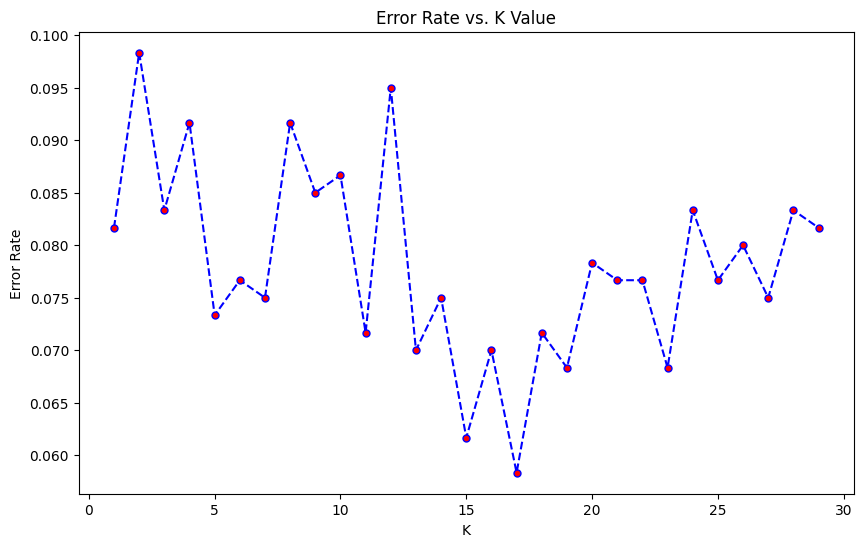

In [22]:
# Menggunakan nilai weighthing yang tinggi pada korelasi tinggi
weights = [0.7, 0.1, 0.1, 0.1]

# Menggunakan elbow diagram
error_rate = []
for i in range(1,30):
    knn = WeightedKNNAlgorithm(k=i, weights=weights)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

# Plotting elbow diagram
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [23]:
# Penggunaan hasil pada data test
test_data = pd.read_csv('../data/test.csv')
features = test_data[columns_to_include]

# Proses normalisasi data
scaler_final = Scaler()
feature_test = scaler.fit_transform(features)

feature_test

,ram,battery_power,px_width,px_height
0,0.197690,0.384461,0.543434,0.064990
1,0.827558,0.541192,0.794613,0.784067
2,0.952995,0.946417,0.839731,0.137841
3,0.782971,0.056932,0.057912,0.065514
4,0.117916,0.685867,0.740067,0.077044
...,...,...,...,...
1995,0.370132,0.896852,0.789226,0.685535
1996,0.333602,0.376423,0.141414,0.053459
1997,0.950846,0.633624,0.097643,0.179245
1998,0.165995,0.390489,0.268013,0.061845


In [26]:
# Gunakan model KNN terbaik yang sebelumnya dibangun
knn_kaggle = WeightedKNNAlgorithm(k=17, weights=weights)  # Memilih menggunakan k = 17 berdasar hasil grafik elbow

# Lakukan fit model
knn_kaggle.fit(x_traink, y_traink)

# Lakukan prediksi model
predictions = knn_kaggle.predict(feature_test)

# Membuat dataframe hasil
result_df = pd.DataFrame({'id': test_data['id'], 'price_range': predictions})

# Menyimpan dataframe dalam csv
result_df.to_csv('../result/predictions-knn.csv', index=False)